In [1]:
# import section
import soundfile
from IPython.display import Audio, display
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from google.colab import files

# general setting
np.seterr(divide = 'ignore'); # 'warn'


In [3]:
# TODO: upload all the files that you will be exploring

fh = files.upload()

Saving 01.wav to 01.wav
Saving 02.wav to 02.wav
Saving 03.wav to 03.wav
Saving 04.wav to 04.wav
Saving 05.wav to 05.wav
Saving 06.wav to 06.wav
Saving 07.wav to 07.wav
Saving 08.wav to 08.wav
Saving 09.wav to 09.wav
Saving 10.wav to 10.wav
Saving 11.wav to 11.wav
Saving 12.wav to 12.wav
Saving 13.wav to 13.wav
Saving 14.wav to 14.wav
Saving 15.wav to 15.wav
Saving 16.wav to 16.wav
Saving 17.wav to 17.wav
Saving 18.wav to 18.wav
Saving 19.wav to 19.wav
Saving 20.wav to 20.wav
Saving 21.wav to 21.wav
Saving 22.wav to 22.wav
Saving 23.wav to 23.wav
Saving 24.wav to 24.wav


In [5]:
# TODO: specify the file to explore
filename = '01.wav'


# Read in the data and apply transformations!
y, fs = soundfile.read(filename)
t = np.arange(len(y))/fs
F, T, Y = scipy.signal.stft(y, fs, nperseg=2048,  padded=True, noverlap=1024)
Y_dB = 20*np.log10(np.abs(Y)/np.amax(np.amax(np.abs(Y))));

### Data Exploration

Using the code below, try to measure and record points on the figures that allow you to determine the gender of the speaker and their emotion. For the purposes of this exercise, the gender is either female or male and the emotion is either happy or sad. Record your measurements in a google sheet.

In [20]:
# Controls for Visualizations

# TODO: change these as needed to explore your data up close or zoomed out
time_limit = (0, 4) # bounds on time range in seconds

# TODO: change these as needed to explore your data up close or zoomed out
amplitude_limit = (-0.6, 0.6) # bounds on audio sample height

# TODO: change these as needed to explore your data up close or zoomed out
freq_limit = (0, 24000) # bounds on pitch range in Hz

# TODO: update loudness threshold as needed for exploration
loudness_threshold = -20

# Summary
print("Summary for: ", filename)
print("----------------------")
print("time limit is ", time_limit)
print("amplitude limit is ", amplitude_limit)
print("frequency limit is ", freq_limit)
print("loudness threshold is ", loudness_threshold)


Summary for:  01.wav
----------------------
time limit is  (0, 4)
amplitude limit is  (-0.6, 0.6)
frequency limit is  (0, 24000)
loudness threshold is  -20


Text(0, 0.5, 'Sum over Loud Data Points (A.U.)')

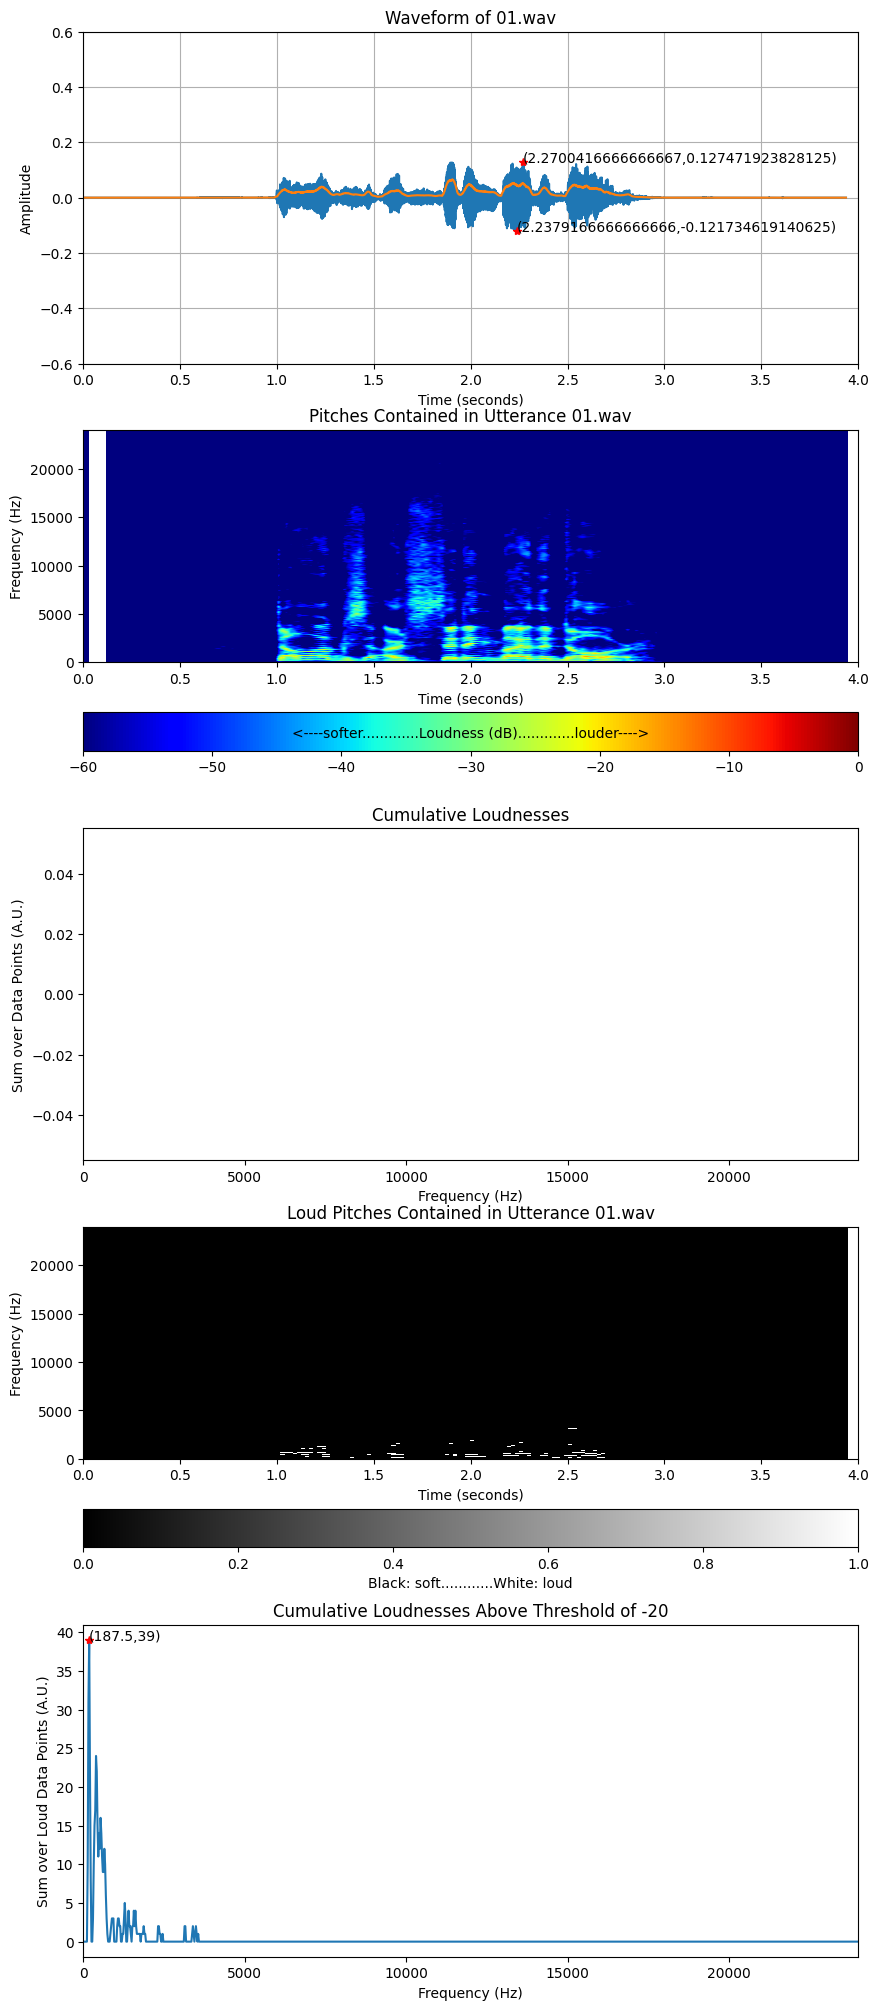

In [15]:
# Plotting

# Set up canvas for plotting
numplts = 5
plt.close('all')
plt.figure(figsize=(10,5*numplts))

# Top Plot
plt.subplot(numplts,1,1)
plt.plot(t, y)
plt.grid()
plt.plot(t[np.argmin(y)], y[np.argmin(y)], 'r*');
plt.annotate(f"({t[np.argmin(y)]},{y[np.argmin(y)]})", (t[np.argmin(y)], y[np.argmin(y)]))
plt.plot(t[np.argmax(y)], y[np.argmax(y)], 'r*');
plt.annotate(f"({t[np.argmax(y)]},{y[np.argmax(y)]})", (t[np.argmax(y)], y[np.argmax(y)]))
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title(f"Waveform of {filename}")
plt.xlim(time_limit)
plt.ylim(amplitude_limit)
plt.plot(t, np.sqrt(np.convolve(np.power(y,2), 0.001*np.ones(1000), mode="same")))

# 2nd Plot
plt.subplot(numplts,1,2)
plt.imshow(Y_dB,
           origin='lower',
           vmin = -60, vmax = 0,
           aspect='auto',
           cmap='jet',
           interpolation='spline16',
           extent=[T[0], T[-1], F[0], F[-1]])
cbar = plt.colorbar(location="bottom")
cbar.ax.set_xlabel('<----softer.............Loudness (dB).............louder---->', labelpad=-35)
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Pitches Contained in Utterance {filename}")
plt.xlim(time_limit)
plt.ylim(freq_limit)

# 3rd Plot
spectrum_full = np.sum(Y_dB, axis=1)
plt.subplot(numplts,1,3)
plt.plot(F, spectrum_full)
# plt.plot(F[np.argmax(spectrum_full)], spectrum_full[np.argmax(spectrum_full)], 'r*');
# plt.annotate(f"({F[np.argmax(spectrum_full)]},{spectrum_full[np.argmax(spectrum_full)]})", (F[np.argmax(spectrum_full)], spectrum_full[np.argmax(spectrum_full)]))
plt.title(f"Cumulative Loudnesses")
plt.xlabel("Frequency (Hz)")
plt.xlim(freq_limit)
plt.ylabel("Sum over Data Points (A.U.)")

# 4th Plot
Y_dB_loud = Y_dB >= loudness_threshold
plt.subplot(numplts,1,4)
plt.imshow(Y_dB_loud,
           origin='lower',
           vmin = 0, vmax = 1,
           aspect='auto',
           cmap='gray',
           interpolation='None',
           extent=[T[0], T[-1], F[0], F[-1]])
cbar = plt.colorbar(location="bottom")
cbar.ax.set_xlabel('Black: soft............White: loud')
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.title(f"Loud Pitches Contained in Utterance {filename}")
plt.xlim(time_limit)
plt.ylim(freq_limit)

# Bottom Plot
spectrum = np.sum(Y_dB_loud, axis=1)
plt.subplot(numplts,1,5)
plt.plot(F, spectrum)
plt.plot(F[np.argmax(spectrum)], spectrum[np.argmax(spectrum)], 'r*');
plt.annotate(f"({F[np.argmax(spectrum)]},{spectrum[np.argmax(spectrum)]})", (F[np.argmax(spectrum)], spectrum[np.argmax(spectrum)]))
plt.title(f"Cumulative Loudnesses Above Threshold of {loudness_threshold}")
plt.xlabel("Frequency (Hz)")
plt.xlim(freq_limit)
plt.ylabel("Sum over Loud Data Points (A.U.)")


In [ ]:
# Ground Truth
Audio(y,rate=fs)

## Recorded Data

In [ ]:
# variables holding the data
# Note, the variables will appear horizontal, but they can still be conceived as
# the column variables that you have explored in prior labs

# In data files, the variables are separated by commas but....in python it is
# easier to organize data by
# listing out observations separated by commas! Don't confuse variables and observations.

# Here is an example variable with 9 total observations. The first example observation is 90
# the last example observation is 10.
example_variable = [90,80,70,60,50,40,30,20,10]


# Make sure that EVERY variable is updated for a given observation
# In other words, every variable must have the SAME NUMBER of observations
# and the Nth observation in all variables must come from the SAME DATA

# When recording, dont go past 3 decimal places.

filename = [01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24] # just write the number
max_abs_amplitude = [.127,.281,.596,.262,.155,.352,.19,]
most_common_freq = []
frequency_with_most_loud_moments = [187, 257, 281, 281, 234, 539, 210, ]
threshold_used = [-20, -20, -20, -20, -20, -20, -20]
wav_starting_timestamp = [1, 1, .5, 1, 1, 1, 1, ]
wav_ending_timestamp = [2.75, 2.75, 3.5, 2.5, 2.75, 2.75, 3.25, ]
ground_truth_gender = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]

# TODO: find the lines of code that are responsible for plotting the red stars in the top plot
# TODO: Copy these^^^^ lines into blogpost.md as a fenced code block [see Ref #2]

In [ ]:
# plot trends with the recorded variables

In [ ]:
# Which files have male speakers
# which files have female speakers
# Which files are happy
# Which files are sad

## References

1. RAVDESS Audio https://zenodo.org/records/1188976
3. [Fenced Code Blocks in Markdown](https://docs.github.com/en/get-started/writing-on-github/working-with-advanced-formatting/creating-and-highlighting-code-blocks)
2. [Matplotlib Ref Online](https://web.p.ebscohost.com/ehost/detail/detail?vid=0&sid=d5aba6ec-19dc-464d-b337-8658ff347c7c%40redis&bdata=JkF1dGhUeXBlPWlwLHNoaWImc2l0ZT1laG9zdC1saXZl#AN=2548565&db=e900xww)